<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импорт необходимых библиотек**

In [ ]:
import tensorflow as tf
from tqdm import tqdm_notebook
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras import layers as L
from keras import backend as K
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from collections import OrderedDict
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

**Подготовка данных**

In [ ]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

(40000, 32, 32, 3) (40000, 1)


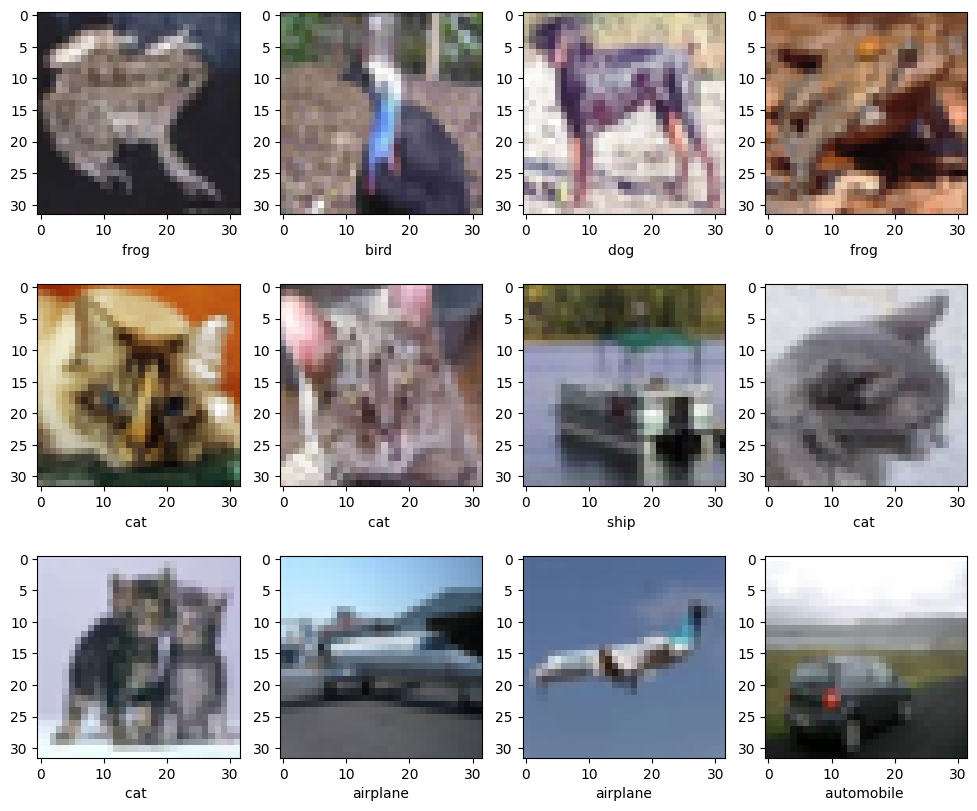

In [ ]:
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

Приведём все данные в диапазон

In [ ]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [ ]:
assert np.shape(X_train) == (40000, 32, 32, 3), "data shape should not change"
assert 0.9 <= max(map(np.max, (X_train, X_val, X_test))) <= 1.05
assert 0.0 <= min(map(np.min, (X_train, X_val, X_test))) <= 0.1
assert len(np.unique(X_test / 255.)) > 10, "make sure you casted data to float type"

**Реализация простой нейросети**

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=X_train.shape[1:]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')

])

In [ ]:
dummy_pred = model.predict(X_train[:20])
assert dummy_pred.shape == (20, 10)
assert np.allclose(dummy_pred.sum(-1), 1)
print("Успех!")

1/1 [==============================] - 0s 122ms/step
Успех!


**1.1 Будем минимизировать многоклассовую кроссэнтропию с помощью sgd. Необходимо получить сеть, которая достигнет не менее 45% accuracy на тестовых данных.**

In [ ]:
y_train, y_val = (keras.utils.to_categorical(y) for y in (y_train, y_val))

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
             tf.keras.callbacks.TensorBoard(log_dir='./logs'),
             tf.keras.callbacks.EarlyStopping(patience=3)]

In [ ]:
## TODO
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=16, epochs=32, callbacks=callbacks, validation_split=0.2)

Epoch 1/32
2000/2000 [==============================] - 10s 4ms/step - loss: 1.7336 - accuracy: 0.3734 - val_loss: 1.6101 - val_accuracy: 0.4256
Epoch 2/32
  24/2000 [..............................] - ETA: 9s - loss: 1.5353 - accuracy: 0.4297

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2000/2000 [==============================] - 8s 4ms/step - loss: 1.5356 - accuracy: 0.4504 - val_loss: 1.5421 - val_accuracy: 0.4541
Epoch 3/32
2000/2000 [==============================] - 8s 4ms/step - loss: 1.4686 - accuracy: 0.4753 - val_loss: 1.5212 - val_accuracy: 0.4625
Epoch 4/32
2000/2000 [==============================] - 8s 4ms/step - loss: 1.4173 - accuracy: 0.4940 - val_loss: 1.5185 - val_accuracy: 0.4621
Epoch 5/32
2000/2000 [==============================] - 9s 4ms/step - loss: 1.3770 - accuracy: 0.5095 - val_loss: 1.4896 - val_accuracy: 0.4690
Epoch 6/32
2000/2000 [==============================] - 8s 4ms/step - loss: 1.3339 - accuracy: 0.5247 - val_loss: 1.4859 - val_accuracy: 0.4736
Epoch 7/32
2000/2000 [==============================] - 7s 4ms/step - loss: 1.2989 - accuracy: 0.5367 - val_loss: 1.4959 - val_accuracy: 0.4725
Epoch 8/32
2000/2000 [==============================] - 8s 4ms/step - loss: 1.2648 - accuracy: 0.5481 - val_loss: 1.5286 - val_accuracy: 0.4744
Epo

Пробовал изменять значения batch_size и количество epochs, но самое оптимальное значение по качеству и времени работы у параметров batch_size = 16 и epochs = 32.

In [ ]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 [==============================] - 1s 2ms/step

 Test_acc = 0.4848
 Not bad!


## Карманная сверточная сеть

**Задание 1.2 (обязательно)** Реализуйте небольшую свёрточную сеть. Совсем небольшую:
1. Входной слой
2. Свёртка 3x3 с 10 фильтрами
3. Нелинейность на ваш вкус
4. Max-pooling 2x2
5. Вытягиваем оставшееся в вектор (Flatten)
6. Полносвязный слой на 100 нейронов
7. Нелинейность на ваш вкус
8. Выходной полносвязный слой с softmax

Обучите её так же, как и предыдущую сеть. Если всё хорошо, у вас получится accuracy не меньше __50%__.

In [ ]:
## TODO
new_model = tf.keras.models.Sequential([
    layers.Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])



In [ ]:
new_callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='new_model.{epoch:02d}-{val_loss:.2f}.h5'),
             tf.keras.callbacks.TensorBoard(log_dir='./logs'),
             tf.keras.callbacks.EarlyStopping(patience=3)]

In [ ]:
## TODO
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
new_model.fit(X_train, y_train, batch_size=16, epochs=32, callbacks=new_callbacks, validation_split=0.2)

Epoch 1/32
2000/2000 [==============================] - 10s 4ms/step - loss: 1.6437 - accuracy: 0.4063 - val_loss: 1.4067 - val_accuracy: 0.4952
Epoch 2/32
  51/2000 [..............................] - ETA: 5s - loss: 1.4008 - accuracy: 0.4841

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2000/2000 [==============================] - 7s 4ms/step - loss: 1.3606 - accuracy: 0.5123 - val_loss: 1.4170 - val_accuracy: 0.4942
Epoch 3/32
2000/2000 [==============================] - 8s 4ms/step - loss: 1.2836 - accuracy: 0.5467 - val_loss: 1.3366 - val_accuracy: 0.5235
Epoch 4/32
2000/2000 [==============================] - 8s 4ms/step - loss: 1.2319 - accuracy: 0.5634 - val_loss: 1.3339 - val_accuracy: 0.5224
Epoch 5/32
2000/2000 [==============================] - 8s 4ms/step - loss: 1.1883 - accuracy: 0.5819 - val_loss: 1.3236 - val_accuracy: 0.5383
Epoch 6/32
2000/2000 [==============================] - 9s 4ms/step - loss: 1.1465 - accuracy: 0.5972 - val_loss: 1.2656 - val_accuracy: 0.5561
Epoch 7/32
2000/2000 [==============================] - 8s 4ms/step - loss: 1.1114 - accuracy: 0.6091 - val_loss: 1.3353 - val_accuracy: 0.5334
Epoch 8/32
2000/2000 [==============================] - 8s 4ms/step - loss: 1.0773 - accuracy: 0.6214 - val_loss: 1.2663 - val_accuracy: 0.5558
Epo

In [ ]:
predict_x = new_model.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 [==============================] - 1s 2ms/step

 Test_acc = 0.5774
 Not bad!


**Задание 1.3 (опционально)** Попробуйте использовать различные методы оптимизации (sgd, momentum, adam) с параметрами по умолчанию. Какой из методов работает лучше?

Для удобства напишем класс Evaluator, который принимает в себя дикты виды {имя_оптимайзера: инстанс}, {имя модели: инстанс} и обучает всевозможные комбинации моделей с оптимайзерами при помощи метода fit (попутно записывая логи отдельно для каждой модели). Также пригодится метод evaluate для отображения итоговых скоров.

In [ ]:
class Evaluator(list):
    def __init__(self, models, optimizers='adam', loss=keras.losses.categorical_crossentropy,
                 metrics=[keras.metrics.categorical_accuracy]):
        '''
            models: dict {name: model}
            optimizers: list of optimizers or just one optimizer
        '''
        if not isinstance(models, dict):
            models = {'single_model': models}
        if not isinstance(optimizers, dict):
            optimizers = {str(optimizers.__class__): optimizers}
        super().__init__([(model_name, keras.models.clone_model(model), optimizer_name, optimizer)
                          for model_name, model in models.items()
                          for optimizer_name, optimizer in optimizers.items()])
        for _, model, _, optimizer in self:
            model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def fit(self, X, y, validation_data=(), max_epochs=100, verbose=0, callbacks=[], batch_size=32):
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):
            model.fit(X, y, validation_data=validation_data or None, epochs=max_epochs, verbose=verbose,
                      batch_size=batch_size, callbacks=callbacks + [keras.callbacks.TensorBoard(
                          log_dir='./logs/{}_{}'.format(model_name, optimizer_name))])

    def fit_generator(self, X, y, validation_data=(), max_epochs=100, verbose=1, callbacks=[], batch_size=32):
        datagen = keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
        )
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):
            model.fit_generator(datagen.flow(X, y, batch_size=batch_size), epochs=max_epochs,
                validation_data=validation_data or None, verbose=verbose,
                callbacks=callbacks + [keras.callbacks.TensorBoard(
                    log_dir='./logs/{}_{}'.format(model_name, optimizer_name))])

    def evaluate(self, X, y, metric):
        for model_name, model, optimizer_name, _ in self:
            print('Final score of {}_{} is {}'.format(model_name, optimizer_name,
                  metric(y_test, model.predict(X_test).argmax(axis=1))))

In [ ]:
!rm -rf ./logs

In [ ]:
## TODO
optimizers = {
    'sgd': optimizers.SGD(),  # Стохастический градиентный спуск (SGD) без момента
    'momentum': optimizers.SGD(learning_rate=0.01, momentum=0.9),  # SGD с моментом
    'adam': optimizers.Adam()  # Оптимизатор Adam
    }

In [ ]:
evaluator = Evaluator(model, optimizers=optimizers)
evaluator.fit(X_train, y_train, validation_data=(X_val, y_val))
evaluator.evaluate(X_test, y_test, accuracy_score)

<ipython-input-69-e9ddea6ddcac>:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):


  0%|          | 0/3 [00:00<?, ?it/s]

313/313 [==============================] - 1s 2ms/step
Final score of single_model_sgd is 0.4619
313/313 [==============================] - 1s 2ms/step
Final score of single_model_momentum is 0.4491
313/313 [==============================] - 1s 2ms/step
Final score of single_model_adam is 0.3875


Можем заметить, что оптимизатор sgd имеет наибольшее значение accuracy_score.

**Задание 1.4 (опционально) Добавьте нормализацию по батчу (BatchNormalization) между свёрткой и активацией. Попробуйте использовать несколько нормализаций — в свёрточных и полносвязных слоях.**

Для удобства реализуем класс Models, который по сути будет являться списком моделей с двумя методами: add (добавить слой ко всем моделям) и add_create (создать новую модель на основе базовой с дополнительным слоем).

In [ ]:
class Models(OrderedDict):
    def __init__(self, models):
        if not isinstance(models, dict):
            models = OrderedDict({'base_model': models})
        super().__init__(models)

    def add(self, layer):
        for name, model in self.items():
            model.add(layer)

    def add_create(self, name, layer):
        base_model = next(iter(self.items()))[1]
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})

    def add_update(self, name, layer):
        base_model = self[next(reversed(self))]
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})

In [ ]:
model_BatchNormalization = tf.keras.models.Sequential([
    layers.Conv2D(10, kernel_size=(3, 3), input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model_BatchNormalization.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_BatchNormalization.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 10)        280       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 10)        40        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 30, 30, 10)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 10)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2250)              0         
                                                                 
 dense_20 (Dense)            (None, 100)             

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32, 32, 32)        128       
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_15 (Dense)            (None, 32)                1048608   
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 1050122 (4.01 MB)
Trainable params: 1050122 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 10)        280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 10)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2250)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               225100    
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 226390 (884.34 KB)
Trainable params: 226390 (884.34 KB)
Non-trainable params: 0 (0.00 Byte)
______________

Если вывести информацию по всем трём моделям, то можем заметить, что наибольшее количество параметров у исходной простой сети без свёртки - 1 050 122. Наименьшее количество параметров у сети со свёрткой. Промежуточное положение занимает сеть со свёрткой и нормализацией батча, при этом у неё возникает 220 необучаемых параметра.

Можем сделать вывод, что свёртка даёт значительное уменьшение количества параметров модели (в 4.64 раза меньше для нашей модели), что позитивно скажется на скорости обучения и затрачиваемых на это ресурсах.

**Задание 1.5 (опционально) Посмотрите на batch_size (параметр model.fit) - при большем батче модель будет быстрее проходить эпохи, но с совсем огромным батчом вам потребуется больше эпох для сходимости (т.к. сеть делает меньше шагов за одну эпоху). Найдите такое значение, при котором модель быстрее достигает точности 55%. Hint: используйте early stopping callback.**

Для анализа возьмём свёрточную модель.

In [ ]:
## TODO
new_model_test = tf.keras.models.Sequential([
    layers.Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [ ]:
new_callbacks_test = [tf.keras.callbacks.ModelCheckpoint(filepath='new_model_test.{epoch:02d}-{val_loss:.2f}.h5'),
             tf.keras.callbacks.TensorBoard(log_dir='./logs'),
             tf.keras.callbacks.EarlyStopping(patience=3)]

In [ ]:
## TODO
new_model_test.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
new_model_test.fit(X_train, y_train, batch_size=4, epochs=16, callbacks=new_callbacks, validation_split=0.2)

Epoch 1/16
8000/8000 [==============================] - 33s 4ms/step - loss: 0.2154 - accuracy: 0.9289 - val_loss: 4.2095 - val_accuracy: 0.5247
Epoch 2/16
  50/8000 [..............................] - ETA: 25s - loss: 0.1200 - accuracy: 0.9550

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8000/8000 [==============================] - 32s 4ms/step - loss: 0.2260 - accuracy: 0.9271 - val_loss: 4.3868 - val_accuracy: 0.5305
Epoch 3/16
8000/8000 [==============================] - 31s 4ms/step - loss: 0.2180 - accuracy: 0.9301 - val_loss: 4.4152 - val_accuracy: 0.5236
Epoch 4/16
8000/8000 [==============================] - 32s 4ms/step - loss: 0.2186 - accuracy: 0.9317 - val_loss: 4.4859 - val_accuracy: 0.5221


In [ ]:
predict_x_test = new_model_test.predict(X_test)
classes_x_test = np.argmax(predict_x_test,axis=1)

test_acc = accuracy_score(y_test, classes_x_test)
print("\n Test_acc =", test_acc)
assert test_acc > 0.55, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 [==============================] - 1s 2ms/step

 Test_acc = 0.5233


AssertionError: Not good enough. Back to the drawing board :)

Брал различные значения batch_size и получил следующие результаты:

batch_size = 4; Test_acc = 0.5233

batch_size = 8; Test_acc = 0.5346

batch_size = 16; Test_acc = 0.5672

batch_size = 32; Test_acc = 0.5582

batch_size = 64; Test_acc = 0.5616

batch_size = 128; Test_acc = 0.5643

Можем заметить, что при размере батча 8 и 4 получаем заметное ухудшение метрики качества, которая находится ниже порога.

**Задание 1.7 (обязательно попытаться) Наигравшись выше, обучим большую свёрточную сеть, которая даст на тестовой выборке accuracy больше 80%. В этом задании вам потребуется провести эксперименты, сравнив их между собой в конце. Возможно, может быть несколько проще, если писать выводы во время или сразу после каждого эксперимента, после чего сделать общие выводы.**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [ ]:
val_datagen = ImageDataGenerator()

split = 45000
dg_x_train, dg_x_val = X_train[:split], X_train[split:]
dg_y_train, dg_y_val = y_train[:split], y_train[split:]

In [ ]:
final_model = tf.keras.models.Sequential([
    layers.Conv2D(25, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [ ]:
final_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

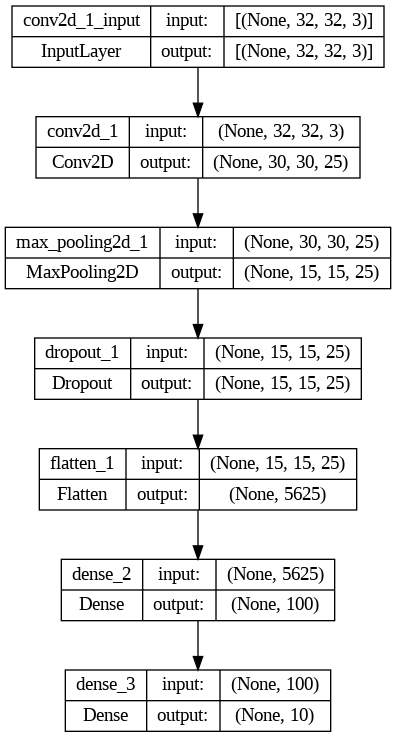

In [ ]:
tf.keras.utils.plot_model(final_model, '123.png', show_shapes=True)

In [ ]:
## TODO
optimizer = Adam(learning_rate=0.15)

final_model.compile(loss='categorical_crossentropy',
                    optimizer=optimizer,
                    metrics=['accuracy'])
final_model.fit(datagen.flow(dg_x_train, dg_y_train, batch_size=64),
                epochs=16,
                callbacks=final_callbacks,
                validation_data=val_datagen.flow(dg_x_val, dg_y_val))

Epoch 1/16
624/625 [============================>.] - ETA: 0s - loss: 25495220224.0000 - accuracy: 0.0433

625/625 [==============================] - 51s 79ms/step - loss: 25550526464.0000 - accuracy: 0.0432
Epoch 2/16
624/625 [============================>.] - ETA: 0s - loss: 175325347840.0000 - accuracy: 0.0602

625/625 [==============================] - 51s 80ms/step - loss: 175467495424.0000 - accuracy: 0.0601
Epoch 3/16
625/625 [==============================] - ETA: 0s - loss: 402130567168.0000 - accuracy: 0.0696

625/625 [==============================] - 53s 85ms/step - loss: 402130567168.0000 - accuracy: 0.0696
Epoch 4/16
625/625 [==============================] - ETA: 0s - loss: 680269643776.0000 - accuracy: 0.0764

625/625 [==============================] - 45s 72ms/step - loss: 680269643776.0000 - accuracy: 0.0764
Epoch 5/16
624/625 [============================>.] - ETA: 0s - loss: 934450364416.0000 - accuracy: 0.0793

625/625 [==============================] - 44s 70ms/step - loss: 933629263872.0000 - accuracy: 0.0797
Epoch 6/16
625/625 [==============================] - ETA: 0s - loss: 1194339729408.0000 - accuracy: 0.0851

625/625 [==============================] - 46s 73ms/step - loss: 1194339729408.0000 - accuracy: 0.0851
Epoch 7/16
625/625 [==============================] - ETA: 0s - loss: 1356960628736.0000 - accuracy: 0.0856

625/625 [==============================] - 45s 71ms/step - loss: 1356960628736.0000 - accuracy: 0.0856
Epoch 8/16
625/625 [==============================] - ETA: 0s - loss: 1758775476224.0000 - accuracy: 0.0888

625/625 [==============================] - 44s 71ms/step - loss: 1758775476224.0000 - accuracy: 0.0888
Epoch 9/16
624/625 [============================>.] - ETA: 0s - loss: 2016079118336.0000 - accuracy: 0.0873

625/625 [==============================] - 52s 83ms/step - loss: 2017978089472.0000 - accuracy: 0.0872
Epoch 10/16
625/625 [==============================] - ETA: 0s - loss: 2337345372160.0000 - accuracy: 0.0898

625/625 [==============================] - 44s 71ms/step - loss: 2337345372160.0000 - accuracy: 0.0898
Epoch 11/16
624/625 [============================>.] - ETA: 0s - loss: 2536587657216.0000 - accuracy: 0.0896

625/625 [==============================] - 44s 71ms/step - loss: 2536180547584.0000 - accuracy: 0.0894
Epoch 12/16
624/625 [============================>.] - ETA: 0s - loss: 2972072017920.0000 - accuracy: 0.0924

625/625 [==============================] - 44s 71ms/step - loss: 2970706247680.0000 - accuracy: 0.0939
Epoch 13/16
625/625 [==============================] - ETA: 0s - loss: 3364808818688.0000 - accuracy: 0.0931

625/625 [==============================] - 44s 71ms/step - loss: 3364808818688.0000 - accuracy: 0.0931
Epoch 14/16
624/625 [============================>.] - ETA: 0s - loss: 3583212519424.0000 - accuracy: 0.0942

625/625 [==============================] - 44s 70ms/step - loss: 3582906859520.0000 - accuracy: 0.0940
Epoch 15/16
624/625 [============================>.] - ETA: 0s - loss: 3932003762176.0000 - accuracy: 0.0969

625/625 [==============================] - 44s 71ms/step - loss: 3931989606400.0000 - accuracy: 0.0967
Epoch 16/16
624/625 [============================>.] - ETA: 0s - loss: 3917311639552.0000 - accuracy: 0.0996

625/625 [==============================] - 44s 71ms/step - loss: 3914820222976.0000 - accuracy: 0.0995


In [ ]:
predict_x=final_model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
if test_acc > 0.8:
    print("Это победа!")

Брал различные значения batch_size и epochs - получил следующие результаты:

learning_rate=0.01 для Adam:

batch_size = 8; epochs = 16; Test_acc = 0.0928

batch_size = 16; epochs = 16; Test_acc = 0.0935. Здесь при обучении была деградация по качеству от эпохи к эпохе.

batch_size = 32; epochs = 16; Test_acc = 0.1024. Здесь при обучении значение качества модели оставалось практически на одном уровне от эпохи к эпохе.

Примем learning_rate=0.001 для Adam:

При данном значении получал метрику равную 0.000. Пробовал различные функции активации - все давали аналогичный результат, кроме sigmoid (здесь значение метрики было 1.0).

Примем learning_rate=0.1 для Adam:

batch_size = 32; epochs = 16; Test_acc = 0.095.

Перепробовал большое количество различных гиперпараметров, различные функции активации, различное значение параметра dropout, различное количество слоёв и различные значения скорости обучения. В большинстве случаев модель деградирует по качеству и точность стремится к нулю. В других случаях модель переобучается и точность равняется единице.